## Inferential Statistics Project Coded

***Anand BR, BATCH: PGPDSBA.O.JAN24***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')


#### Problem1
***A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.***

In [3]:
striker_player_injured = 45
striker_player_not_injured = 32
total_striker_player = striker_player_injured + striker_player_not_injured
total_striker_player

77

In [4]:
forward_player_injured = 56
forward_player_not_injured = 38
total_forward_player = forward_player_injured + forward_player_not_injured
total_forward_player

94

In [5]:
attackingmid_player_injured = 24
attackingmid_player_not_injured = 11
total_attackingmid_player = attackingmid_player_injured + attackingmid_player_not_injured
total_attackingmid_player

35

In [6]:
winger_player_injured = 20
winger_player_not_injured = 9
total_winger_player = winger_player_injured + winger_player_not_injured
total_winger_player

29

In [7]:
total_player_injury = 145
total_player_not_injured = 90
total_players = total_winger_player + total_forward_player + total_attackingmid_player + total_striker_player
total_players

235

In [8]:
# 1.1 What is the probability that a randomly chosen player would suffer an injury?

prob_injury_player = total_player_injury/total_players
print(f'Randomly chosen player suffer an injury is {round(prob_injury_player *100, 2)}%')

Randomly chosen player suffer an injury is 61.7%


In [9]:
# 1.2 What is the probability that a player is a forward or a winger?

prob_forward_or_winger = (total_winger_player + total_forward_player)/total_players
print(f'player is a forward or a winger {round(prob_forward_or_winger *100, 2)}%')

player is a forward or a winger 52.34%


In [10]:
#1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

prob_striker_and_injury = striker_player_injured/total_players
print(f'player plays in a striker position and has a foot injury {round(prob_striker_and_injury *100, 2)}%')

player plays in a striker position and has a foot injury 19.15%


In [11]:
# 1.4 What is the probability that a randomly chosen injured player is a striker?
# Baye's Theorem can also be applied here 
prob_injured_striker = striker_player_injured/total_player_injury
print(f'chosen injured player is a striker {round(prob_injured_striker *100, 2)}%')

chosen injured player is a striker 31.03%


In [12]:
probabilities = [round(prob_injury_player *100, 2), round(prob_forward_or_winger *100, 2),round(prob_striker_and_injury *100, 2), round(prob_injured_striker *100, 2) ]
labels = ['prob_injury_player', 'prob_forward_or_winger', 'prob_striker_and_injury', 'prob_injured_striker']


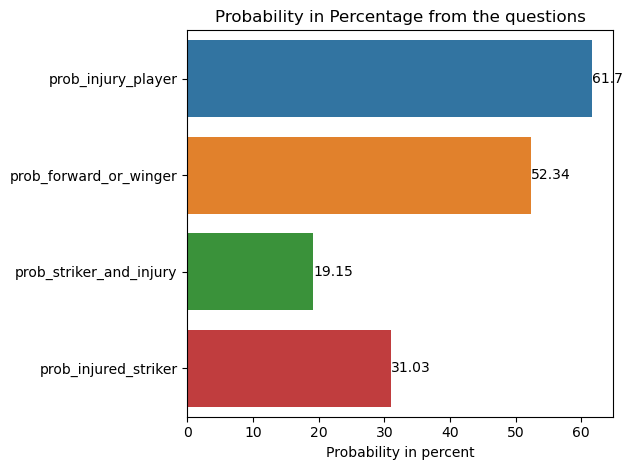

In [13]:
g = sns.barplot(x = probabilities, y = labels)
g.bar_label(g.containers[0])
plt.xlabel('Probability in percent')
plt.title('Probability in Percentage from the questions')
plt.tight_layout()
plt.savefig('is_coded_problem1.jpg')
plt.show()


## Problem 2 

***The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)***

In [14]:
mu = 5
sigma = 1.5

In [15]:
# as stated normally distributed in the question 
from scipy.stats import norm

In [16]:
# 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

## use CDF

x_cdf = norm.cdf(3.17, mu, sigma)
print(f'proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm {round(x_cdf*100,2)}%')

proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm 11.12%


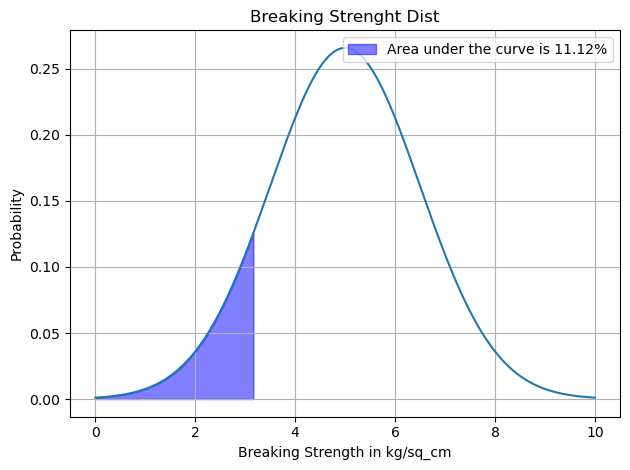

In [17]:
x = np.linspace(0,10,1000)
y = norm.pdf(x, mu, sigma)
label = f'Area under the curve is {round(x_cdf*100,2)}%'
plt.plot(x, y)
plt.fill_between(x, y, where=(x <= 3.17), color='blue', alpha=0.5,  label=label)
plt.title('Breaking Strenght Dist')
plt.xlabel('Breaking Strength in kg/sq_cm')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.gray(), plt.grid(True)
plt.tight_layout()
plt.savefig('is_coded_p2.1.jpg')
plt.show()

In [18]:
# 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

# atleast 3.6 - area under the curve => 3.6

x_sf = norm.sf(3.6, mu , sigma)
print(f'proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm {round(x_sf*100,2)}%')

proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm 82.47%


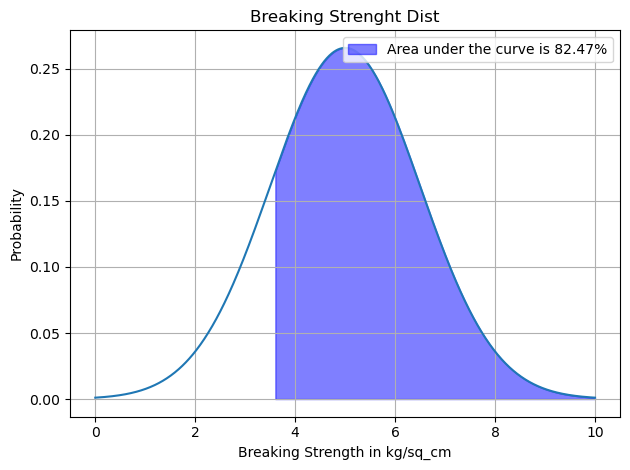

In [19]:
x = np.linspace(0,10,1000)
y = norm.pdf(x, mu, sigma)
label = f'Area under the curve is {round(x_sf*100,2)}%'
plt.plot(x, y)
plt.fill_between(x, y, where=(x >= 3.6), color='blue', alpha=0.5,  label=label)
plt.title('Breaking Strenght Dist')
plt.xlabel('Breaking Strength in kg/sq_cm')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.gray(), plt.grid(True)
plt.tight_layout()
plt.savefig('is_coded_p2.2.jpg')
plt.show()

In [20]:
# 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

# between subtract using cdf or sf

x_between = norm.cdf(5.5, mu, sigma) - norm.cdf(5,mu, sigma)
print(f'proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm {round(x_between*100,2)}%')

proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm 13.06%


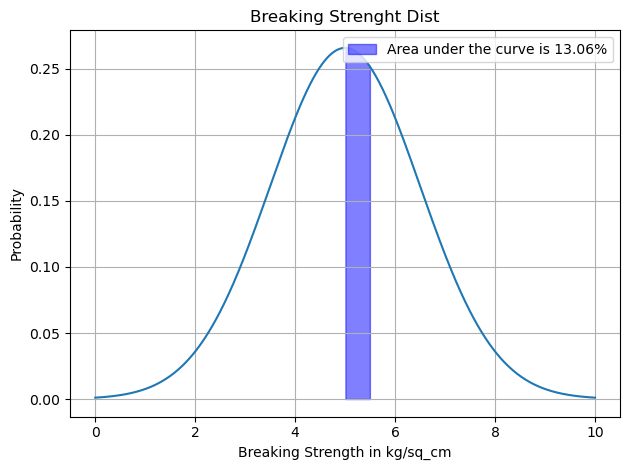

In [21]:
x = np.linspace(0,10,1000)
y = norm.pdf(x, mu, sigma)
label = f'Area under the curve is {round(x_between*100,2)}%'
plt.plot(x, y)
plt.fill_between(x, y, where=((x >= 5) & (x<=5.5)), color='blue', alpha=0.5,  label=label)
plt.title('Breaking Strenght Dist')
plt.xlabel('Breaking Strength in kg/sq_cm')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.gray(), plt.grid(True)
plt.tight_layout()
plt.savefig('is_coded_p2.3.jpg')
plt.show()

In [22]:
# 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?
x_not_between = norm.sf(7.5,mu,sigma) + norm.cdf(3,mu,sigma)
print(f'proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm {round(x_not_between*100,2)}%')

proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm 13.9%


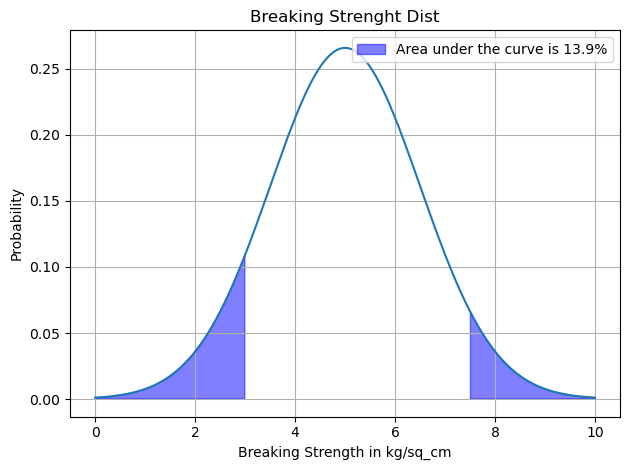

In [23]:
x = np.linspace(0,10,1000)
y = norm.pdf(x, mu, sigma)
label = f'Area under the curve is {round(x_not_between*100,2)}%'
plt.plot(x, y)
plt.fill_between(x, y, where=((x >= 7.5) | (x<=3)), color='blue', alpha=0.5,  label=label)
plt.title('Breaking Strenght Dist')
plt.xlabel('Breaking Strength in kg/sq_cm')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.gray(), plt.grid(True)
plt.tight_layout()
plt.savefig('is_coded_p2.4.jpg')
plt.show()

## Problem 3

***Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);***


In [24]:
alpha = 0.05

In [25]:
df = pd.read_csv('Zingaro_Company.csv')
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


***based on the data it 2 samples and both are independent samples, using t-test independent***
***lets perform the Hypothesis analysis in 5 seqences***

#### 1. Hypothesis
- define the Null and Alternate Hypothesis and tailed test

#### 2. Significance level (CI , alpha)

#### 3. Calculate Test Statistics

#### 4. calculate critical value

#### 5. Conclusion


In [26]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [27]:
df.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

In [28]:
## fix the space 

In [29]:
df.rename(columns={'Unpolished ' : 'Unpolished'}, inplace=True)
df.columns

Index(['Unpolished', 'Treated and Polished'], dtype='object')

In [30]:
df.shape

(75, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [32]:
df['Unpolished'].describe()

count     75.000000
mean     134.110527
std       33.041804
min       48.406838
25%      115.329753
50%      135.597121
75%      158.215098
max      200.161313
Name: Unpolished, dtype: float64

In [33]:
df['Treated and Polished'].describe()

count     75.000000
mean     147.788117
std       15.587355
min      107.524167
25%      138.268300
50%      145.721322
75%      157.373318
max      192.272856
Name: Treated and Polished, dtype: float64

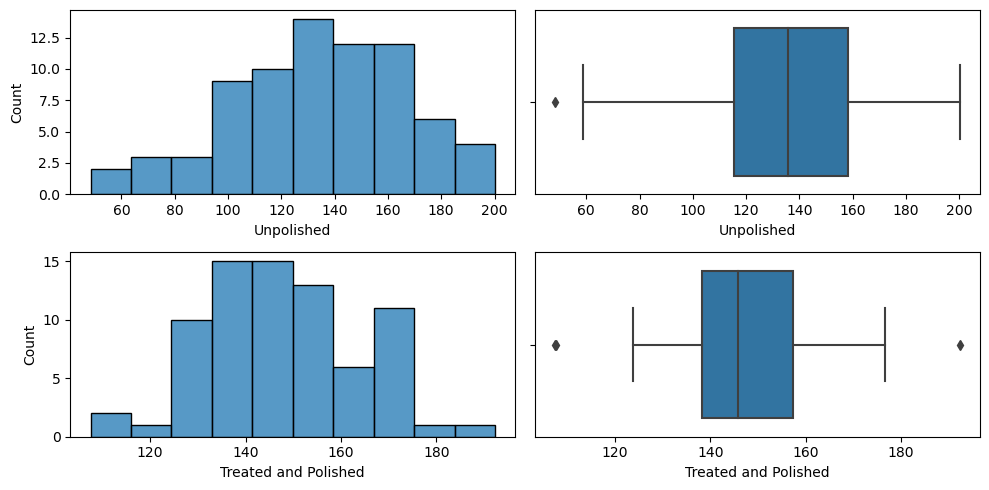

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10,5))
sns.histplot(data=df, x = df.Unpolished, ax=axes[0][0], bins=10)

sns.boxplot(data=df, x = df.Unpolished, ax=axes[0][1])

sns.histplot(data=df, x = df['Treated and Polished'], ax=axes[1][0], bins = 10)

sns.boxplot(data=df, x = df['Treated and Polished'], ax=axes[1][1])

plt.tight_layout()
plt.savefig('is_coded_p3.jpg')
plt.show()

***Inference about the Data***
- No missing values
- Point estimation of unpolished 134.11
- point estimation of Treated and Polished is 147.78
- Few Outliers in both fields, which is not skewing data significantly

#### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?
***Point estimate of Unpolisheed Stone is 134.11 , need to calculate t-test for one sample as Population std is not given***


- H0: Hardness index of Unpolished stones atleast 150 (>= 150)
- Ha: Hardness index of Unpolished stones less than 150 (<150)

***One sample, One Tailed T-Test***

In [35]:
t_stats, p_value = ttest_1samp(df.Unpolished, 150,alternative='less')
print(f'One Sample t statistics {t_stats} , p_value {p_value}')

One Sample t statistics -4.164629601426757 , p_value 4.171286997419652e-05


In [36]:
from statsmodels.stats import weightstats

In [37]:
weightstats.ztest(x1 = df.Unpolished , value=150, alternative='smaller')

(-4.164629601426757, 1.5592921935294406e-05)

In [38]:
t_stats, p_value = ttest_1samp(df['Treated and Polished'], 150, alternative='less')
print(f'One Sample t statistics {t_stats} , p_value {p_value}')

One Sample t statistics -1.228910663544687 , p_value 0.11149948416904217


In [39]:
weightstats.ztest(x1 = df['Treated and Polished'] , value=150, alternative='smaller')

(-1.228910663544687, 0.10955265145604037)

#### 3.2 Is the mean hardness of the polished and unpolished stones the same?

- H0: Mean of the Unploished and Polished stones are same 
- Ha: Mean is different 

In [40]:
t_stats , p_value = ttest_ind( df['Treated and Polished'], df['Unpolished'],equal_var=False)
print(f'2 Sample t statistics {t_stats} , p_value {p_value}')

2 Sample t statistics 3.242232050141406 , p_value 0.001588379295584306


In [41]:
t_stats , p_value = ttest_ind( df['Treated and Polished'], df['Unpolished'],equal_var=True)
print(f'2 Sample t statistics {t_stats} , p_value {p_value}')

2 Sample t statistics 3.2422320501414053 , p_value 0.0014655150194628353


In [42]:
weightstats.ztest(x1 = df['Treated and Polished'] , x2= df['Unpolished'])

(3.242232050141406, 0.0011859741319915178)

## Problem 4

***Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.***

In [43]:
dental = pd.read_excel('Dental+Hardness+data.xlsx')
dental.head(10)

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
6,1,2,1,1500,782
7,1,2,1,1600,698
8,1,2,1,1700,665
9,1,2,2,1500,1115


In [44]:
dental.shape

(90, 5)

In [45]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [46]:
dental.Alloy.value_counts()

Alloy
1    45
2    45
Name: count, dtype: int64

In [47]:
dental.Method.value_counts()

Method
1    30
2    30
3    30
Name: count, dtype: int64

In [48]:
dental.Dentist.value_counts()

Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64

In [49]:
dental.Temp.value_counts()

Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64

In [50]:
dental.Response.mean()

741.7777777777778

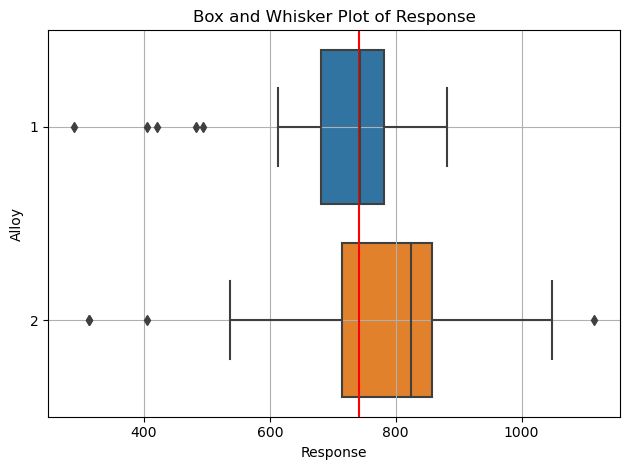

In [51]:
sns.boxplot(data= dental, x = dental.Response, y = dental.Alloy, orient='h')
plt.title('Box and Whisker Plot of Response')
plt.tight_layout()
plt.grid(True)
plt.axvline(dental.Response.mean(), color='red')
plt.savefig('is_coded_p4.jpg')
plt.show()

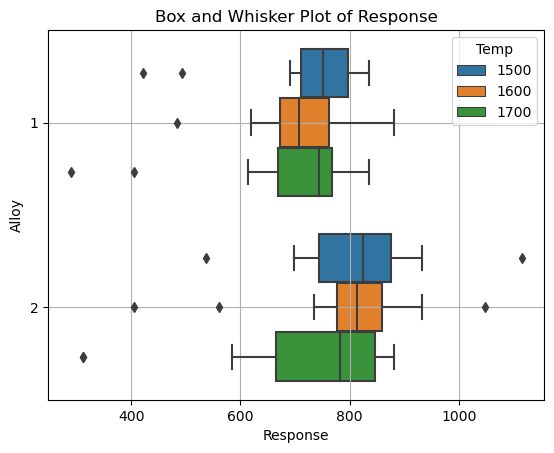

In [52]:
sns.boxplot(data= dental, x = dental.Response, y = dental.Alloy, orient='h', hue=dental['Temp'])
plt.title('Box and Whisker Plot of Response')
plt.grid(True)
plt.show()

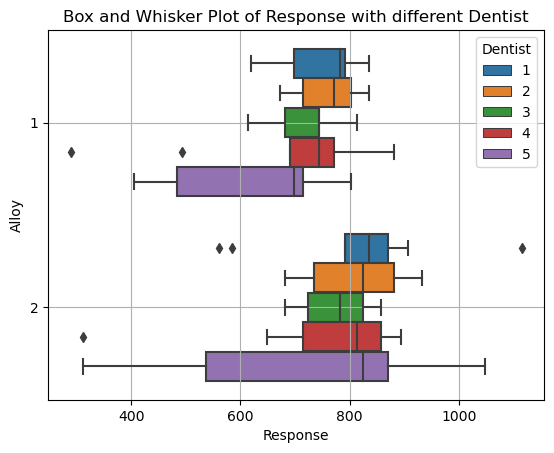

In [53]:
sns.boxplot(data= dental, x = dental.Response, y = dental.Alloy, orient='h', hue=dental['Dentist'])
plt.title('Box and Whisker Plot of Response with different Dentist')
plt.grid(True)
plt.show()

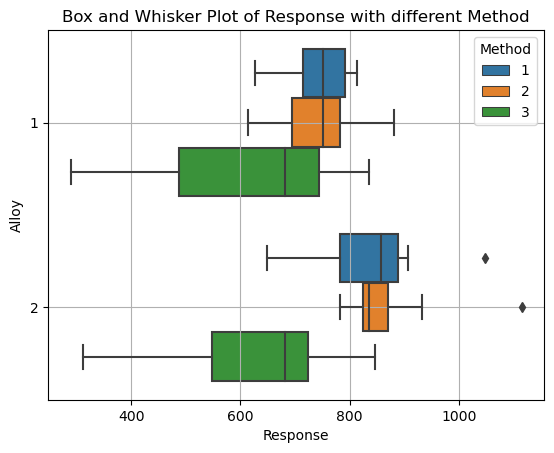

In [54]:
sns.boxplot(data= dental, x = dental.Response, y = dental.Alloy, orient='h', hue=dental['Method'])
plt.title('Box and Whisker Plot of Response with different Method')
plt.grid(True)
plt.show()

In [55]:
dental_copy = dental.copy()

In [56]:
dental.columns

Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response'], dtype='object')

In [57]:
dental['Dentist'] = pd.Categorical(dental['Dentist'])
dental['Method'] = pd.Categorical(dental['Method'])
dental['Temp'] = pd.Categorical(dental['Temp'])

In [58]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     int64   
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.3 KB


#### Inference:
- Dentist, Method , Temp are Independent fields to be considered to test Hypothesis for Response Dependent Field
- Dependent Fields converted to Categorical fields
- Split DataFrame to 2 data sets based on Alloy Type
  


***Problem mentions to consider the Alloy types Separately, creating 2 data sets***

In [59]:
dental_A1 = dental[(dental.Alloy == 1)]
dental_A2 = dental[(dental.Alloy == 2)]

In [60]:
dental_A1.shape, dental_A2.shape , dental.shape

((45, 5), (45, 5), (90, 5))

In [61]:
dental_A1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [62]:
dental_A2.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


In [63]:
print(dental_A1.info())
print('*'*30)
print('*'*30)
print(dental_A2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 86
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     int64   
 3   Temp      45 non-null     category
 4   Response  45 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 1.7 KB
None
******************************
******************************
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 3 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   45 non-null     category
 1   Method    45 non-null     category
 2   Alloy     45 non-null     int64   
 3   Temp      45 non-null     category
 4   Response  45 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 1.7 KB
None


In [64]:
print((dental_A1.describe()))

       Alloy    Response
count   45.0   45.000000
mean     1.0  707.488889
std      0.0  121.194551
min      1.0  289.000000
25%      1.0  681.000000
50%      1.0  743.000000
75%      1.0  782.000000
max      1.0  882.000000


In [65]:
print(dental_A2.describe())

       Alloy     Response
count   45.0    45.000000
mean     2.0   776.066667
std      0.0   160.892595
min      2.0   312.000000
25%      2.0   715.000000
50%      2.0   824.000000
75%      2.0   858.000000
max      2.0  1115.000000


### Test if the given sample is from a Normally distributed Population using
- shapiro
- Levene
- anderson

#### Shapiro Test

In [66]:
statistic,p_value = stats.shapiro(dental_A1['Response'])
print(f'Shapiro-Wilk Test Statistics for Alloy_1 : {statistic}')
print(f'Shapiro-Wilk p value for Alloy_1 : {p_value}')

Shapiro-Wilk Test Statistics for Alloy_1 : 0.8304629921913147
Shapiro-Wilk p value for Alloy_1 : 1.1945070582441986e-05


In [67]:
statistic,p_value = stats.shapiro(dental_A2['Response'])
print(f'Shapiro-Wilk Test Statistics for Alloy_2 : {statistic}')
print(f'Shapiro-Wilk p value for Alloy_2 : {p_value}')

Shapiro-Wilk Test Statistics for Alloy_2 : 0.887769341468811
Shapiro-Wilk p value for Alloy_2 : 0.00040293222991749644


#### Levene Test: ***Test for Variance equality***

In [68]:
statistic, p_value = stats.levene(dental.Response[dental.Alloy==1], 
                           dental.Response[dental.Alloy==2])
print(f'Levene Test Statistics for Alloy groups : {statistic}')
print(f'Levene p value for Alloy groups : {p_value}')                         

Levene Test Statistics for Alloy groups : 1.4194717470917784
Levene p value for Alloy groups : 0.23669380462584474


#### Anderson-Darling Test: ***assess whether given sample data comes from a Normally distributed Population***

In [69]:
x = stats.anderson(dental_A1.Response)
x.statistic, x.critical_values, x.significance_level
print(f'Anderson-Darling Test Statistics for Alloy_1 :  {x.statistic}')
print(f'critical value for Alloy_1: {x.critical_values}')
print(f'significance Value for Alloy_1: {x.significance_level}')

Anderson-Darling Test Statistics for Alloy_1 :  2.561066309273201
critical value for Alloy_1: [0.535 0.609 0.731 0.853 1.014]
significance Value for Alloy_1: [15.  10.   5.   2.5  1. ]


In [70]:
x = stats.anderson(dental_A2.Response)
x.statistic, x.critical_values, x.significance_level
print(f'Anderson-Darling Test Statistics for Alloy_2 :  {x.statistic}')
print(f'critical value for Alloy_2: {x.critical_values}')
print(f'significance Value for Alloy_2: {x.significance_level}')

Anderson-Darling Test Statistics for Alloy_2 :  1.8931311726356412
critical value for Alloy_2: [0.535 0.609 0.731 0.853 1.014]
significance Value for Alloy_2: [15.  10.   5.   2.5  1. ]


#### Inference:
- Levene's Test p value is greater than alpha (0.05), which suggests Variances across the groups are equal approximately  or No significance evidence to reject Ho
- Shapiro Test p value is very low than alpha (0.05), which Rejects HO or Data might not be Normally distributed
- Anderson-Darling Test p value greater than alpha(0.05), which suggest significance evidence to reject HO or or Data might not be Normally distributed

- Distributions for Both Alloy1 and Alloy2 are not Normally distributed.
- Outliers present in the Data and ANOVA is sensitive to Outliers. 

#### 4.1 How does the hardness of implants vary depending on dentists?

In [71]:
# One way Anova for alloy 1

test_stat, p_value = f_oneway(dental_A1.Response[(dental_A1.Dentist == 1)], 
                              dental_A1.Response[(dental_A1.Dentist == 2)],
                              dental_A1.Response[(dental_A1.Dentist == 3)],
                              dental_A1.Response[(dental_A1.Dentist == 4)],
                              dental_A1.Response[(dental_A1.Dentist == 5)]
                           )
print(f'One way Anova Test_stats Alloy_1 : {test_stat}')
print(f'One way Anova p_value Alloy_1 : {p_value}')

One way Anova Test_stats Alloy_1 : 1.9771119908770842
One way Anova p_value Alloy_1 : 0.11656712140267628


In [72]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


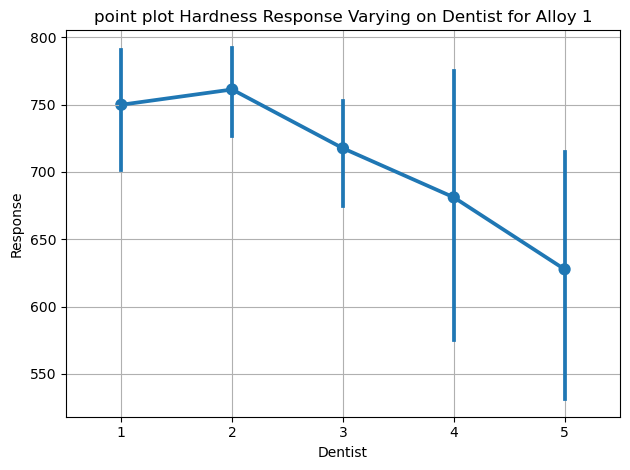

In [73]:
sns.pointplot(data=dental_A1, x = dental_A1.Dentist, y = dental_A1.Response)
plt.title('point plot Hardness Response Varying on Dentist for Alloy 1')
plt.tight_layout()
plt.grid(True)
plt.savefig('is_coded_A1_p4.1.jpg')
plt.show()

In [74]:
# One way Anova for alloy 2
test_stat, p_value = f_oneway(dental_A2.Response[(dental_A2.Dentist == 1)], 
                              dental_A2.Response[(dental_A2.Dentist == 2)],
                              dental_A2.Response[(dental_A2.Dentist == 3)],
                              dental_A2.Response[(dental_A2.Dentist == 4)],
                              dental_A2.Response[(dental_A2.Dentist == 5)]
                           )
print(f'One way Anova Test_stats Alloy_2 : {test_stat}')
print(f'One way Anova p_value Alloy_2 : {p_value}')

One way Anova Test_stats Alloy_2 : 0.5248351000282961
One way Anova p_value Alloy_2 : 0.7180309510793431


In [75]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


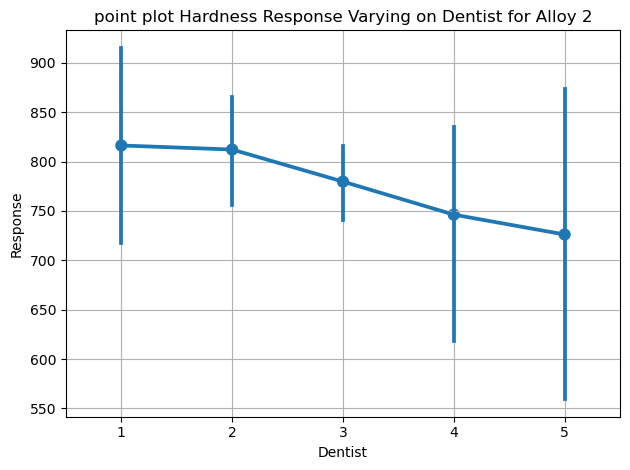

In [76]:
sns.pointplot(data=dental_A2, x = dental_A2.Dentist, y = dental_A2.Response)
plt.title('point plot Hardness Response Varying on Dentist for Alloy 2')
plt.tight_layout()
plt.grid(True)
plt.savefig('is_coded_A2_p4.1.jpg')
plt.show()

#### 4.2 How does the hardness of implants vary depending on methods?

In [77]:
# One way Anova for alloy 1

test_stat, p_value = f_oneway(dental_A1.Response[(dental_A1.Method == 1)], 
                              dental_A1.Response[(dental_A1.Method == 2)],
                              dental_A1.Response[(dental_A1.Method == 3)]
                           )
print(f'One way Anova Test_stats Alloy_1 : {test_stat}')
print(f'One way Anova p_value Alloy_1 : {p_value}')

One way Anova Test_stats Alloy_1 : 6.263326635486233
One way Anova p_value Alloy_1 : 0.004163412167505543


In [78]:
formula = 'Response ~ C(Method)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


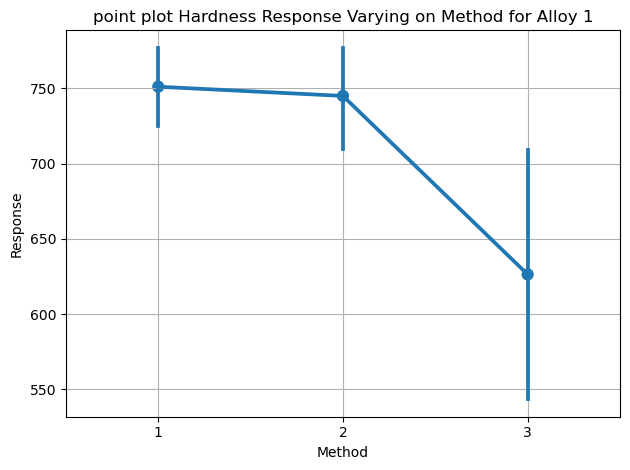

In [79]:
sns.pointplot(data=dental_A1, x = dental_A1.Method, y = dental_A1.Response)
plt.title('point plot Hardness Response Varying on Method for Alloy 1')
plt.tight_layout()
plt.grid(True)
plt.savefig('is_coded_A1_p4.2.jpg')
plt.show()

In [80]:
# One way Anova for alloy 2

test_stat, p_value = f_oneway(dental_A2.Response[(dental_A2.Method == 1)], 
                              dental_A2.Response[(dental_A2.Method == 2)],
                              dental_A2.Response[(dental_A2.Method == 3)]
                           )
print(f'One way Anova Test_stats Alloy_2 : {test_stat}')
print(f'One way Anova p_value Alloy_2 : {p_value}')

One way Anova Test_stats Alloy_2 : 16.41079988438482
One way Anova p_value Alloy_2 : 5.415871051443187e-06


In [81]:
formula = 'Response ~ C(Method)'
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


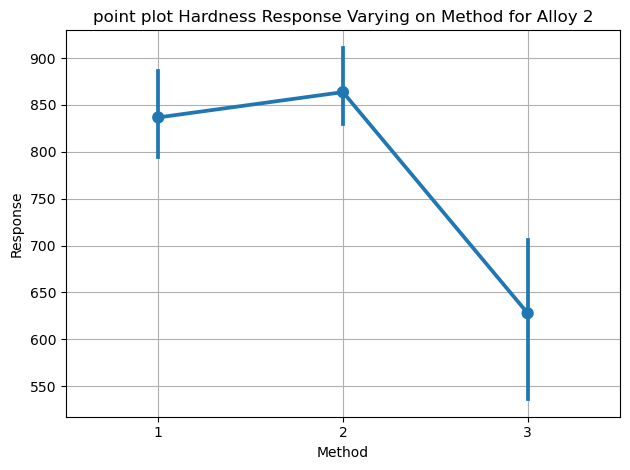

In [82]:
sns.pointplot(data=dental_A2, x = dental_A2.Method, y = dental_A2.Response)
plt.title('point plot Hardness Response Varying on Method for Alloy 2')
plt.tight_layout()
plt.grid(True)
plt.savefig('is_coded_A2_p4.2.jpg')
plt.show()

#### 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

In [83]:
# two way Anova for alloy 1
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                         df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [84]:
formula = 'Response ~ C(Dentist) * C(Method)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [85]:
from tabulate import tabulate
print('*'*100)
print('Interaction between Dentist and Method on the Hardness for Alloy_1')
print('*'*100)
print(tabulate(aov_table, headers = ['degree of freedom',
                                      'sum square',
                                      'mean square',
                                      'F stats',
                                      'P value']))

****************************************************************************************************
Interaction between Dentist and Method on the Hardness for Alloy_1
****************************************************************************************************
                        degree of freedom    sum square    mean square    F stats        P value
--------------------  -------------------  ------------  -------------  ---------  -------------
C(Dentist)                              4        106684       26670.9     3.89964    0.0114843
C(Method)                               2        148472       74236.1    10.8543     0.000284041
C(Dentist):C(Method)                    8        185941       23242.7     3.39838    0.00679275
Residual                               30        205180        6839.33  nan        nan


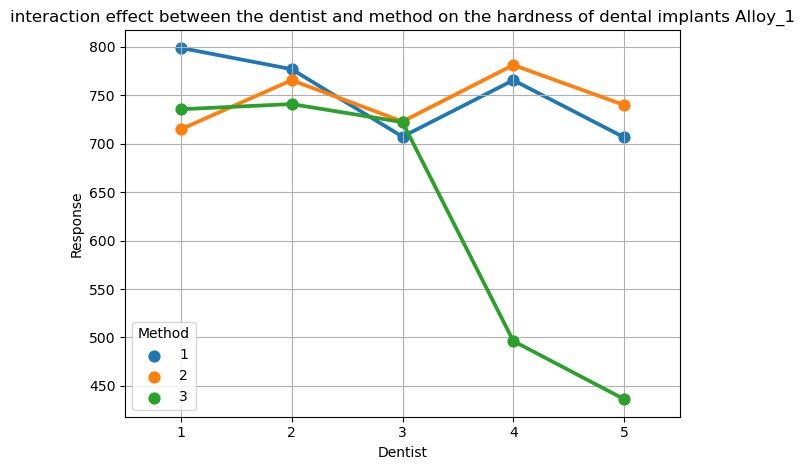

In [86]:
sns.pointplot(data=dental_A1, y= dental_A1.Response, x = dental_A1.Dentist, hue=dental_A1.Method, ci=None)
plt.title('interaction effect between the dentist and method on the hardness of dental implants Alloy_1')
plt.grid(True)
plt.tight_layout()
plt.savefig('is_coded_A1.4.31.jpg')
plt.show()

In [87]:
# two way Anova for alloy 2
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_2:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_2:
                         df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


In [88]:
from tabulate import tabulate
print('*'*100)
print('Interaction between Dentist and Method on the Hardness for Alloy_2')
print('*'*100)
print(tabulate(aov_table, headers = ['degree of freedom',
                                      'sum square',
                                      'mean square',
                                      'F stats',
                                      'P value']))

****************************************************************************************************
Interaction between Dentist and Method on the Hardness for Alloy_2
****************************************************************************************************
                        degree of freedom    sum square    mean square    F stats        P value
--------------------  -------------------  ------------  -------------  ---------  -------------
C(Dentist)                              4       56797.9        14199.5    1.10615    0.371833
C(Method)                               2      499640         249820     19.4612     3.81425e-06
C(Dentist):C(Method)                    8      197460          24682.5    1.92279    0.093234
Residual                               30      385105          12836.8  nan        nan


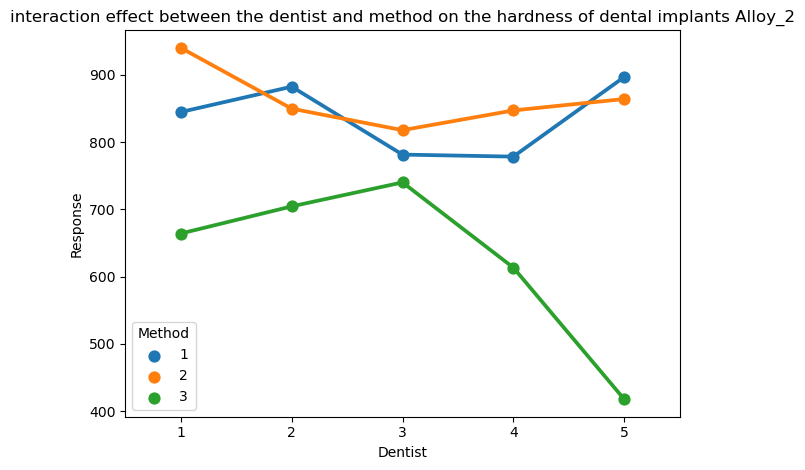

In [89]:
sns.pointplot(data=dental_A2, y= dental_A2.Response, x = dental_A2.Dentist, hue=dental_A2.Method, ci=None)
plt.title('interaction effect between the dentist and method on the hardness of dental implants Alloy_2')
plt.tight_layout()
plt.savefig('is_coded_A2.4.31.jpg')
plt.show()

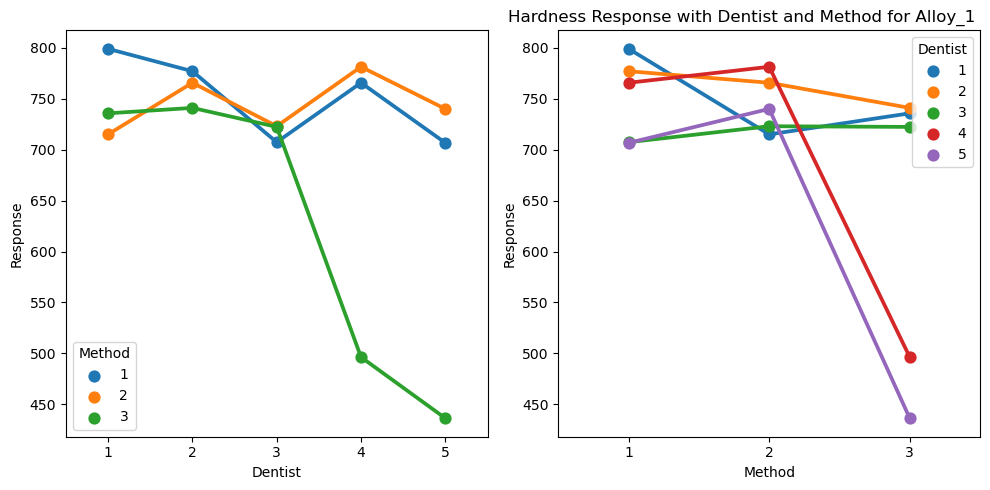

In [90]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.pointplot(data=dental_A1, y= dental_A1.Response, x = dental_A1.Dentist, hue=dental_A1.Method  ,ci=None, ax= axes[0])
sns.pointplot(data=dental_A1, y= dental_A1.Response, x = dental_A1.Method,hue=dental_A1.Dentist, ci=None, ax= axes[1])
plt.title('Hardness Response with Dentist and Method for Alloy_1 ', loc='right')
plt.tight_layout()
plt.savefig('is_coded_A1_4_33.jpg')
plt.show()

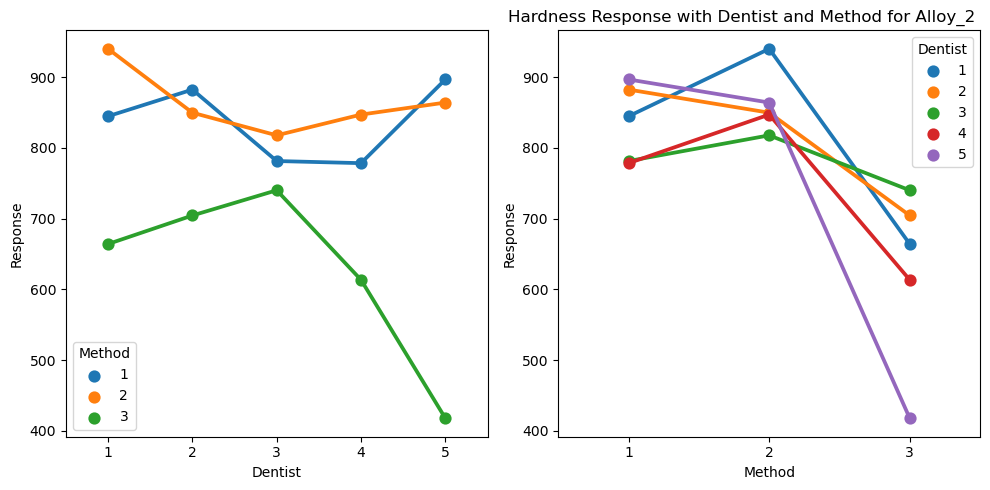

In [91]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
sns.pointplot(data=dental_A2, y= dental_A2.Response, x = dental_A2.Dentist, hue=dental_A2.Method  ,ci=None, ax= axes[0])
sns.pointplot(data=dental_A2, y= dental_A2.Response, x = dental_A2.Method,hue=dental_A2.Dentist, ci=None, ax= axes[1])
plt.title('Hardness Response with Dentist and Method for Alloy_2 ', loc='right')
plt.tight_layout()
plt.savefig('is_coded_A2_4_33.jpg')
plt.show()

In [92]:
m_comp = pairwise_tukeyhsd(endog=dental_A1.Response, groups=dental_A1.Method, alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


#### Above is Mean difference for Method 3 is high for Alloy 1 - resulting Low P-Value

In [93]:
m_comp = pairwise_tukeyhsd(endog=dental_A2.Response, groups=dental_A2.Method, alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


#### Above is Mean difference for Method 3 is high for Alloy 2 - resulting Low P-Value

#### 4.4 How does the hardness of implants vary depending on dentists and methods together?

In [94]:
# two way Anova for alloy 1
formula = 'Response ~ C(Dentist) + C(Method) '
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
               df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


In [95]:
# two way Anova for alloy 2
formula = 'Response ~ C(Dentist) + C(Method) '
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
               df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


#### Comparing all the Categorical components

In [96]:
formula = 'Response ~ C(Dentist) * C(Method)  '
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                         df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [97]:
formula = 'Response ~ C(Dentist) * C(Temp)  '
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                       df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)           4.0  106683.688889  26670.922222  1.703366  0.175297
C(Temp)              2.0   10154.444444   5077.222222  0.324262  0.725563
C(Dentist):C(Temp)   8.0   59705.777778   7463.222222  0.476646  0.862862
Residual            30.0  469733.333333  15657.777778       NaN       NaN


In [98]:
formula = 'Response ~ C(Method) * C(Temp)  '
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                      df         sum_sq       mean_sq         F    PR(>F)
C(Method)           2.0  148472.177778  74236.088889  5.641855  0.007390
C(Temp)             2.0   10154.444444   5077.222222  0.385863  0.682642
C(Method):C(Temp)   4.0   13959.022222   3489.755556  0.265217  0.898357
Residual           36.0  473691.600000  13158.100000       NaN       NaN


In [99]:
m_comp = pairwise_tukeyhsd(endog=dental_A1.Response, groups=dental_A1.Method, alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [100]:
m_comp = pairwise_tukeyhsd(endog=dental_A2.Response, groups=dental_A2.Method, alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


In [101]:
formula = 'Response ~ C(Dentist) * C(Method)  '
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                         df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


In [102]:
formula = 'Response ~ C(Dentist) * C(Temp)  '
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                       df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)           4.0   56797.911111  14199.477778  0.491732  0.741777
C(Temp)              2.0   93748.933333  46874.466667  1.623276  0.214102
C(Dentist):C(Temp)   8.0  122161.955556  15270.244444  0.528813  0.825318
Residual            30.0  866294.000000  28876.466667       NaN       NaN


In [103]:
formula = 'Response ~ C(Method) * C(Temp)  '
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(f'Interaction between Dentist and Method on the Hardness for Alloy_1:\n {aov_table}')

Interaction between Dentist and Method on the Hardness for Alloy_1:
                      df         sum_sq        mean_sq          F    PR(>F)
C(Method)           2.0  499640.400000  249820.200000  17.553524  0.000005
C(Temp)             2.0   93748.933333   46874.466667   3.293617  0.048575
C(Method):C(Temp)   4.0   33264.666667    8316.166667   0.584332  0.675983
Residual           36.0  512348.800000   14231.911111        NaN       NaN


#### Addtional analysis to merge the combination of Dentist and Method and compare

***Combining the Dentist and Methods***

In [104]:
dental_A1['Dentist_Methods'] = dental_A1['Dentist'].astype(str)+dental_A1['Method'].astype(str)
dental_A1['Dentist_Methods'] = pd.Categorical(dental_A1['Dentist_Methods'])

In [105]:
dental_A2['Dentist_Methods'] = dental_A2['Dentist'].astype(str)+dental_A2['Method'].astype(str)
dental_A2['Dentist_Methods'] = pd.Categorical(dental_A2['Dentist_Methods'])

In [106]:
dental_A1.head()

,Dentist,Method,Alloy,Temp,Response,Dentist_Methods
0,1,1,1,1500,813,11
1,1,1,1,1600,792,11
2,1,1,1,1700,792,11
6,1,2,1,1500,782,12
7,1,2,1,1600,698,12


In [107]:
dental_A2.head()

,Dentist,Method,Alloy,Temp,Response,Dentist_Methods
3,1,1,2,1500,907,11
4,1,1,2,1600,792,11
5,1,1,2,1700,835,11
9,1,2,2,1500,1115,12
10,1,2,2,1600,835,12


In [108]:
m_comp = pairwise_tukeyhsd(endog=dental_A1.Response, groups=dental_A1.Dentist_Methods, alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    11     12     -84.0 0.9933 -332.8283  164.8283  False
    11     13  -63.3333 0.9996 -312.1617   185.495  False
    11     21     -22.0    1.0 -270.8283  226.8283  False
    11     22  -33.3333    1.0 -282.1617   215.495  False
    11     23     -58.0 0.9999 -306.8283  190.8283  False
    11     31  -91.6667 0.9853  -340.495  157.1617  False
    11     32     -76.0 0.9975 -324.8283  172.8283  False
    11     33  -76.6667 0.9972  -325.495  172.1617  False
    11     41  -33.3333    1.0 -282.1617   215.495  False
    11     42  -17.6667    1.0  -266.495  231.1617  False
    11     43 -302.6667  0.007  -551.495  -53.8383   True
    11     51  -92.3333 0.9844 -341.1617   156.495  False
    11     52     -59.0 0.9998 -307.8283  189.8283  False
    11     53 -362.6667 0.0007  -611.495 -113.8383   True
    12     13 

In [109]:
m_comp = pairwise_tukeyhsd(endog=dental_A2.Response, groups=dental_A2.Dentist_Methods, alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    11     12   95.3333  0.999 -245.5625  436.2292  False
    11     13 -180.6667 0.8085 -521.5625  160.2292  False
    11     21   37.6667    1.0 -303.2292  378.5625  False
    11     22       5.0    1.0 -335.8958  345.8958  False
    11     23 -140.3333 0.9635 -481.2292  200.5625  False
    11     31  -63.3333    1.0 -404.2292  277.5625  False
    11     32     -27.0    1.0 -367.8958  313.8958  False
    11     33 -104.6667 0.9973 -445.5625  236.2292  False
    11     41  -66.3333    1.0 -407.2292  274.5625  False
    11     42    2.3333    1.0 -338.5625  343.2292  False
    11     43 -231.3333 0.4686 -572.2292  109.5625  False
    11     51      52.0    1.0 -288.8958  392.8958  False
    11     52   19.3333    1.0 -321.5625  360.2292  False
    11     53    -427.0 0.0049 -767.8958  -86.1042   True
    12     13 

In [110]:
formula = 'Response ~  C(Dentist_Methods)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq       mean_sq         F    PR(>F)
C(Dentist_Methods)  14.0  441097.244444  31506.946032  4.606728  0.000221
Residual            30.0  205180.000000   6839.333333       NaN       NaN


In [111]:
formula = 'Response ~  C(Dentist_Methods)'
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq       mean_sq         F    PR(>F)
C(Dentist_Methods)  14.0  753898.133333  53849.866667  4.194953  0.000482
Residual            30.0  385104.666667  12836.822222       NaN       NaN


In [112]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist_Methods)'
model = ols(formula, dental_A1).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)           4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)            2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist_Methods)  14.0  196735.436308  14052.531165   2.054664  0.048044
Residual            30.0  205180.000000   6839.333333        NaN       NaN


In [113]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist_Methods)'
model = ols(formula, dental_A2).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)           4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)            2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist_Methods)  14.0  298459.804047   21318.557432   1.660735  0.119062
Residual            30.0  385104.666667   12836.822222        NaN       NaN


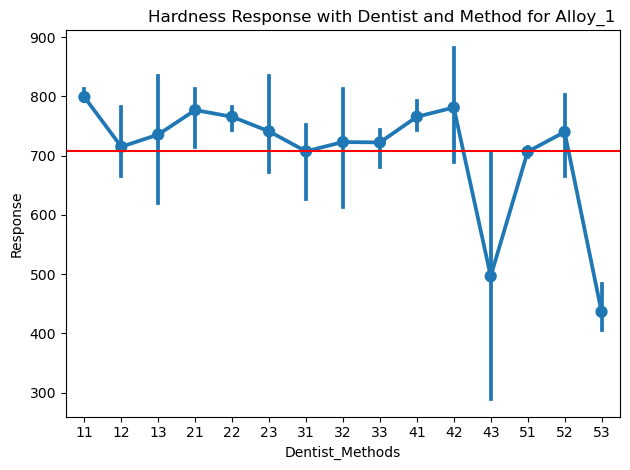

In [114]:
sns.pointplot(data=dental_A1, y= dental_A1.Response, x = dental_A1.Dentist_Methods )
plt.title('Hardness Response with Dentist and Method for Alloy_1 ', loc='right')
plt.axhline(dental_A1.Response.mean(), color = 'red')
plt.tight_layout()
plt.show()

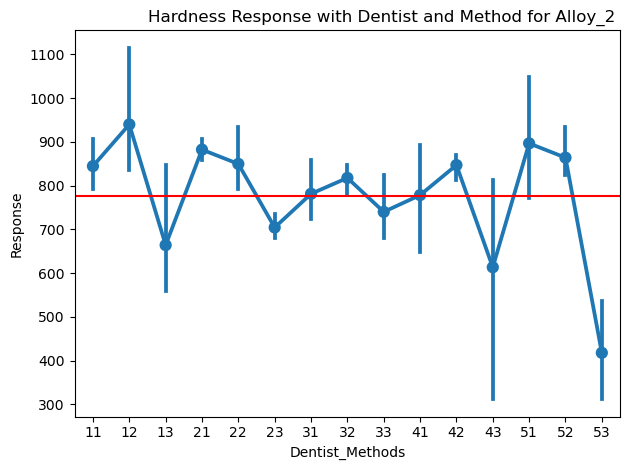

In [115]:
sns.pointplot(data=dental_A2, y= dental_A2.Response, x = dental_A2.Dentist_Methods )
plt.title('Hardness Response with Dentist and Method for Alloy_2 ', loc='right')
plt.axhline(dental_A2.Response.mean(), color = 'red')
plt.tight_layout()
plt.show()

# Thank you